# Decision Tree

### What Is Decision Tree?
- A Decision Tree is a supervised machine learning algorithm used for classification and regression.
- It represents decision in a tree structure, where:
  - each internal node represents a condtion on a feature
  - Each Branch represents the outcome of that coondtion
  - Each leaf node gives the final prediction
- The model works by recursively splitting the data so that similar outputs fall into the same group.

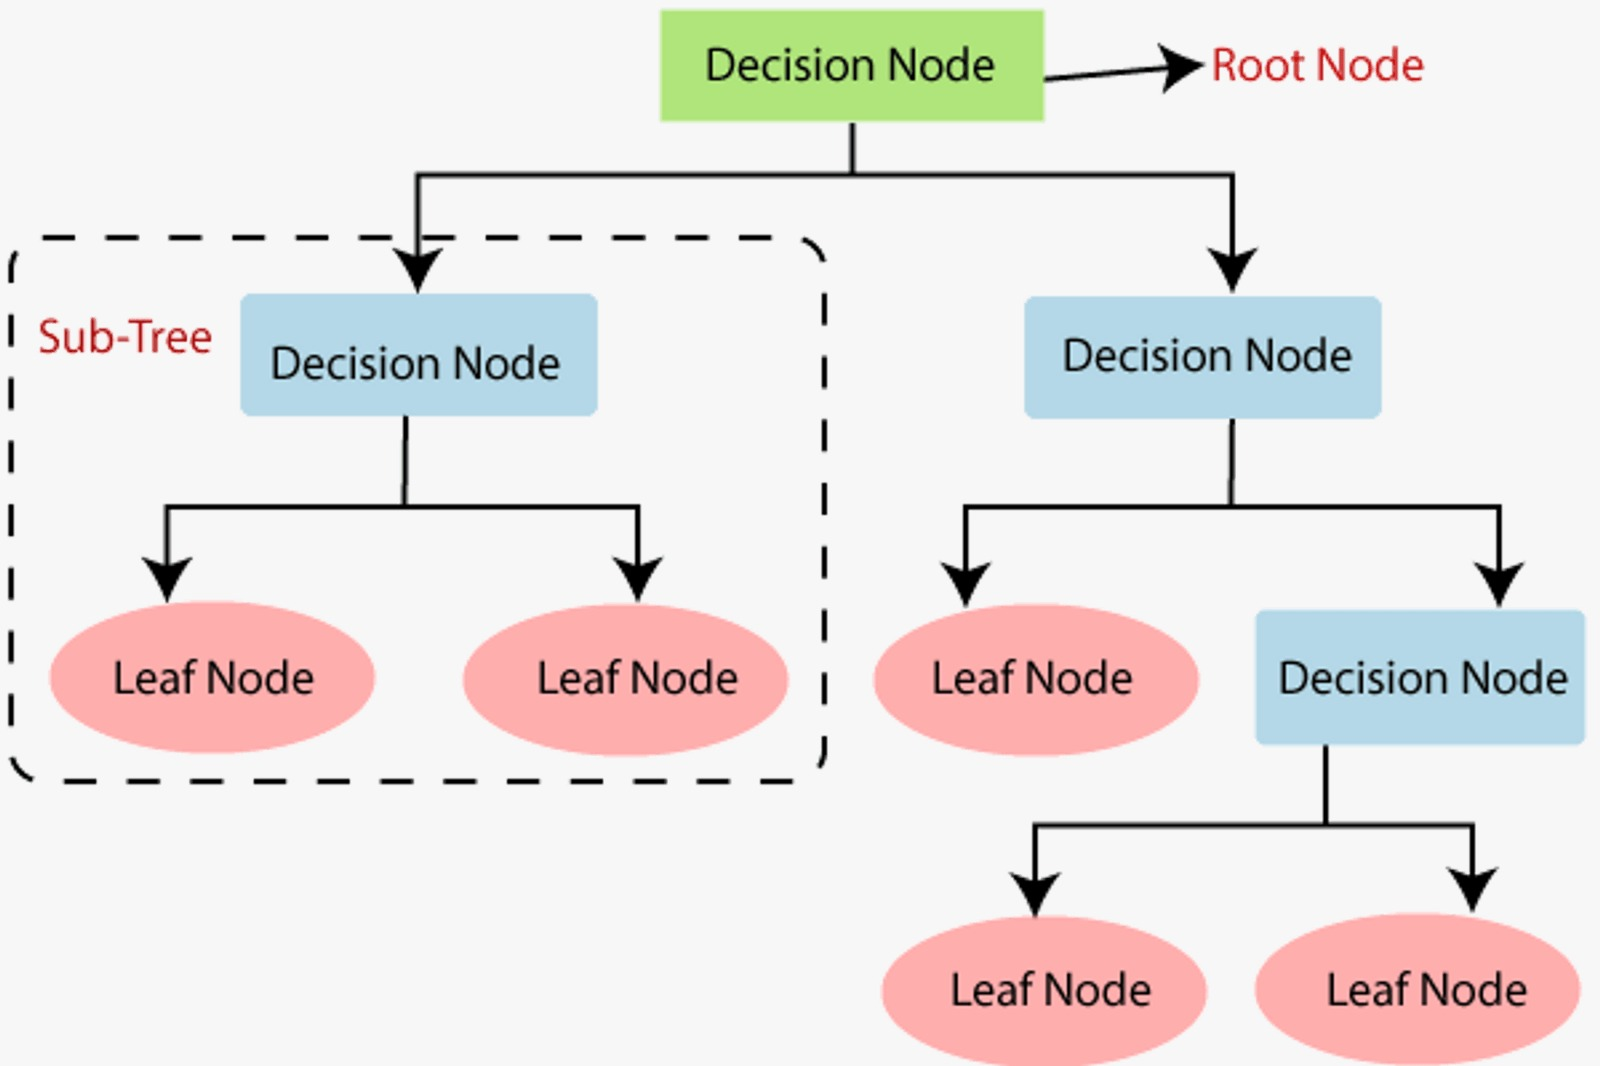

### Decision Tree several key components:
- Root Node: The starting bpoint of the tree, representing the entire dataset.
- Internal/Decision: Anode that represents a test or decision on a specific attribute or feature.
- Branch/Subtree:The outcome of a decision, connecting a parent node to a child node.
- Leaf Node: A Terminal node that does not split further and provides the final prediction or class label.
- Splitting: The Process of diving a node into multiple sub nodes based on a certain conditions.

### 1.Decision Tree Classifier
- A Classification Decission Tree is used awhen the target variable is categorical (discrete classes).

#### Exapmles of target values:
- Yes/No
- Spam/Not Spam
- Pass/Fail

#### How It Works:
- The tree splits the dataset in such a way that each resulting node become as pure as possible, meaning most data points in that node belongs to the same class

### 2.Decision Tree Regression:
- A Regression Decision Tree is used when the target variable is continues (numerical values).

#### Examples of target values:
- House price
- Salary
- Temperature

#### How It Works:
- Instead of class purity, the goal is to minimize prediction error.

## Decision Tree & Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
data= pd.read_csv("house_price_decision_tree.csv")
data

,house_size_sqft,bedrooms,age_years,price_lakhs
0,450,1,25,38.5
1,500,1,22,42.0
2,550,1,20,45.2
3,600,2,18,50.1
4,650,2,17,53.0
...,...,...,...,...
86,4750,5,1,348.0
87,4800,5,1,351.6
88,4850,5,1,355.2
89,4900,5,1,358.8


In [3]:
X=data[['house_size_sqft','bedrooms','age_years']]
y=data['price_lakhs']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
model = DecisionTreeRegressor(criterion='squared_error',max_depth=5,random_state=42)

In [6]:
model.fit(X_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

In [7]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [8]:
train_mse=mean_squared_error(y_train,y_pred_train)
test_mse=mean_squared_error(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 6.263796296296292
Test MSE: 36.81209064327487


In [9]:
new_house=pd.DataFrame({
    'house_size_sqft':[1500],
    'bedrooms':[3],
    'age_years':[5]
})
predicted_price=model.predict(new_house)

print("Predicted House Price:", predicted_price[0])

Predicted House Price: 124.33333333333333


# Random Forest

##### Decision Tree:
- Uses entire dataset
- Builds one tree
- prediction = value from that tree

##### Random Forest:
 Builds multiple decision trees
###### Each Tree:
- uses random samples of data(bootsrapping)
- Uses Random subset of features
- Final prediction = average of all tree predictions

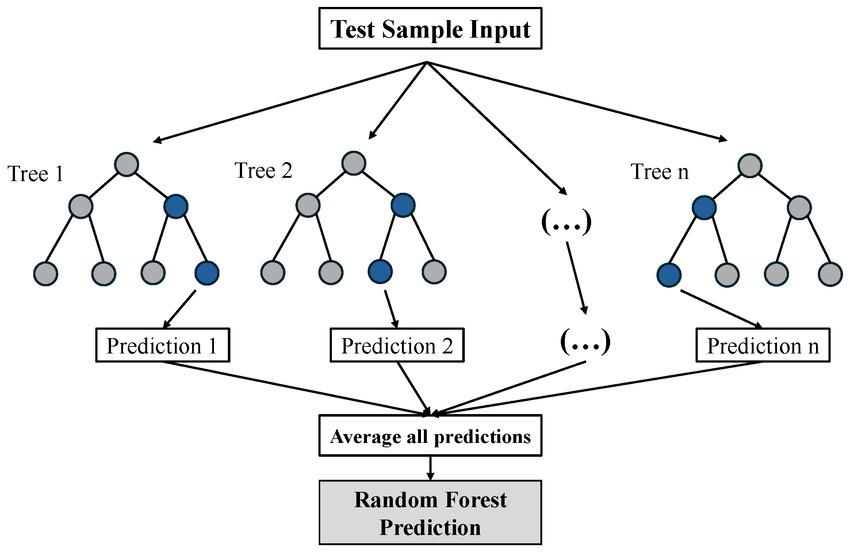

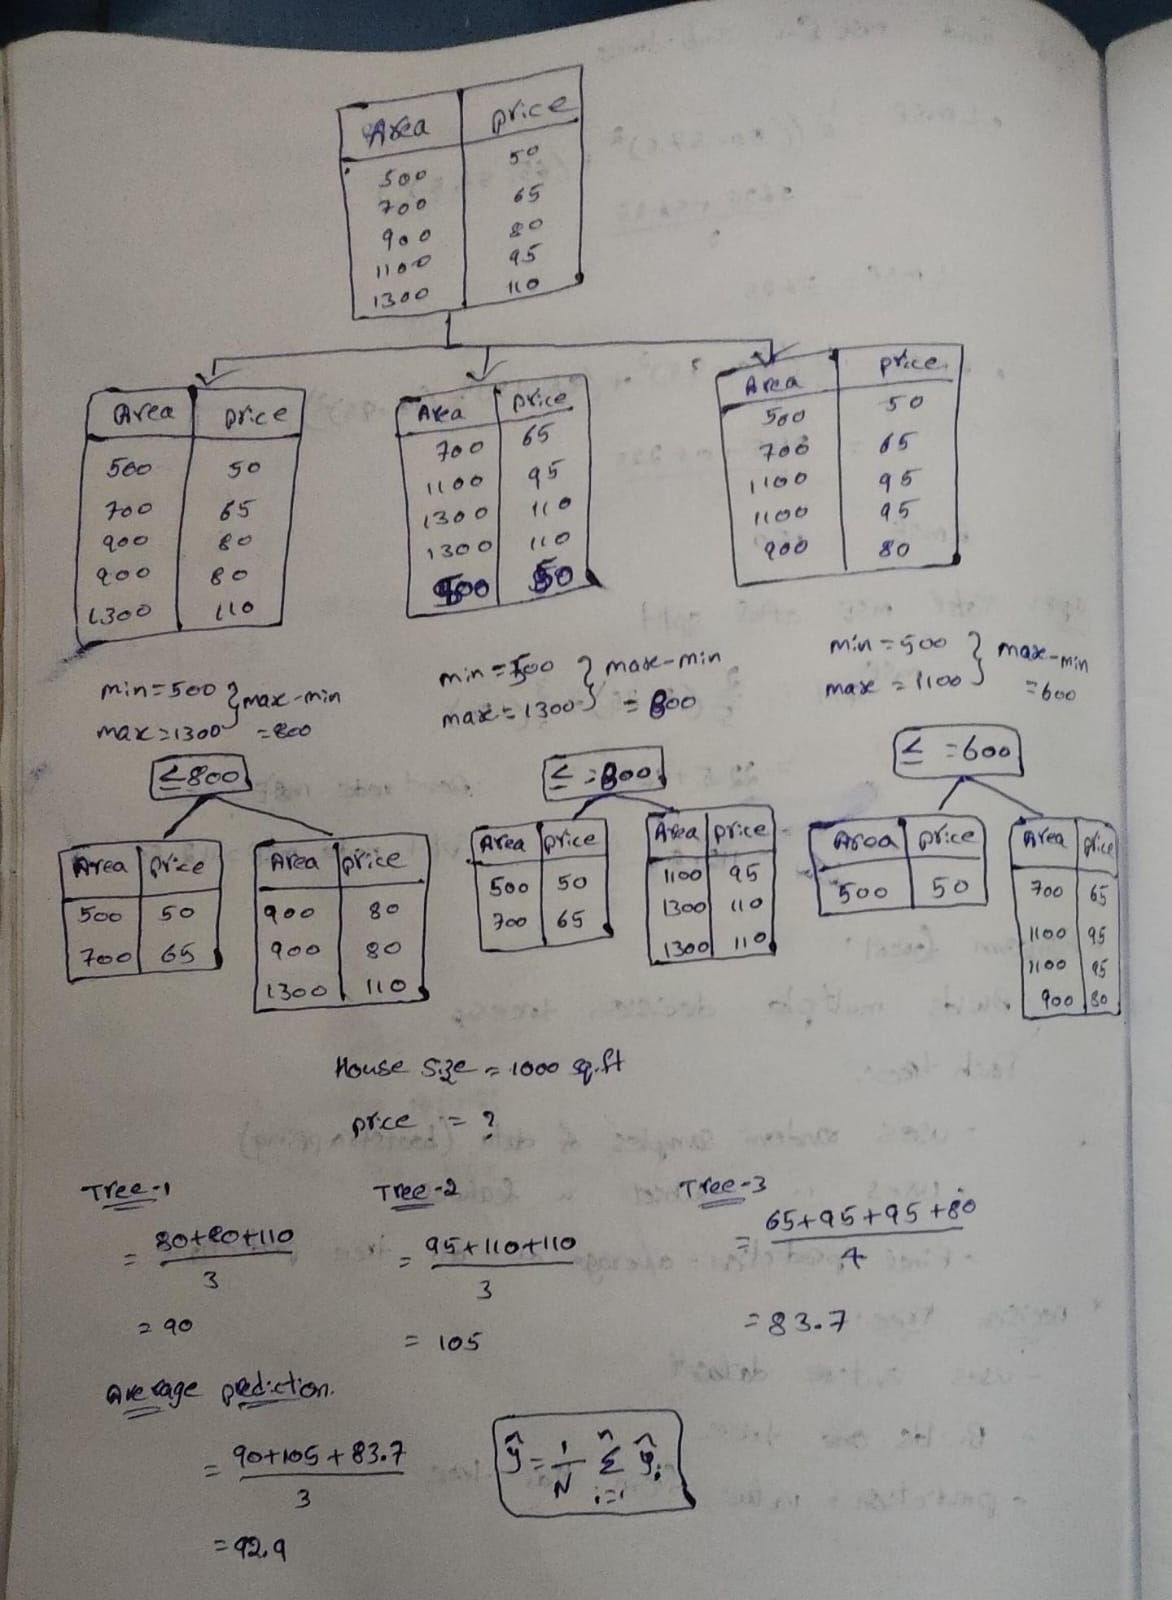

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data= pd.read_csv("house_price_decision_tree.csv")
data

,house_size_sqft,bedrooms,age_years,price_lakhs
0,450,1,25,38.5
1,500,1,22,42.0
2,550,1,20,45.2
3,600,2,18,50.1
4,650,2,17,53.0
...,...,...,...,...
86,4750,5,1,348.0
87,4800,5,1,351.6
88,4850,5,1,355.2
89,4900,5,1,358.8


In [5]:
X=data[['house_size_sqft','bedrooms','age_years']]
y=data['price_lakhs']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
rf_model=RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42)

In [8]:
rf_model.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [9]:
y_pred_train=rf_model.predict(X_train)
y_pred_test=rf_model.predict(X_test)

In [12]:
print("Train MSE:",mean_squared_error(y_train,y_pred_train))
print("Test MSE:", mean_squared_error(y_test,y_pred_test))

print("Train R2:",r2_score(y_train,y_pred_train))
print("Test R2:", r2_score(y_test,y_pred_test))

Train MSE: 2.0254291826887076
Test MSE: 8.705405510048049
Train R2: 0.9997742949260597
Test R2: 0.998981320668142


In [11]:
new_house=pd.DataFrame({
    'house_size_sqft':[1500],
    'bedrooms':[3],
    'age_years':[5]
})
predicted_price=rf_model.predict(new_house)

print("Predicted House Price(Lakhs)", predicted_price[0])

Predicted House Price(Lakhs) 118.04740000000005
